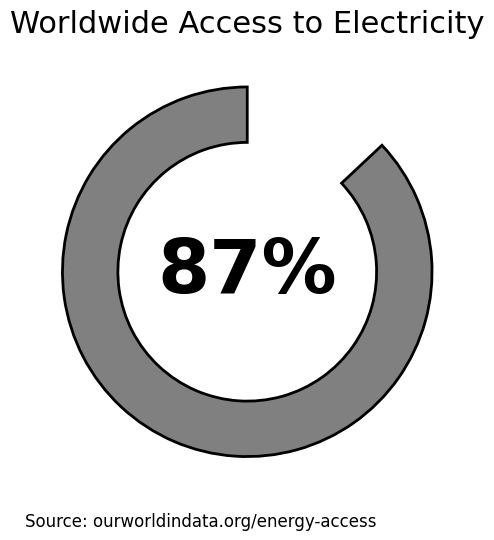

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))
data = [87, 13]  
wedgeprops = {'width':0.3, 
              'edgecolor':'black', 
              'lw':2}  
patches, _ = ax.pie(data, 
					wedgeprops=wedgeprops, 
					startangle=90, 
					colors=['grey', 'white'])
patches[1].set_zorder(0)  
patches[1].set_edgecolor('white')
plt.title('Worldwide Access to Electricity', 
		  fontsize=22, 
		  loc='center')  
plt.text(0, 
         0, 
		 f"{data[0]}%", 
		 ha='center', 
		 va='center',
         weight="bold",
		 fontsize=54)  
plt.text(-1.2, 
         -1.3, 
		 "Source: ourworldindata.org/energy-access", 
		 ha='left', 
		 va='top', 
		 fontsize=12)
fig.savefig("./images/ch07_33.png")
plt.show()

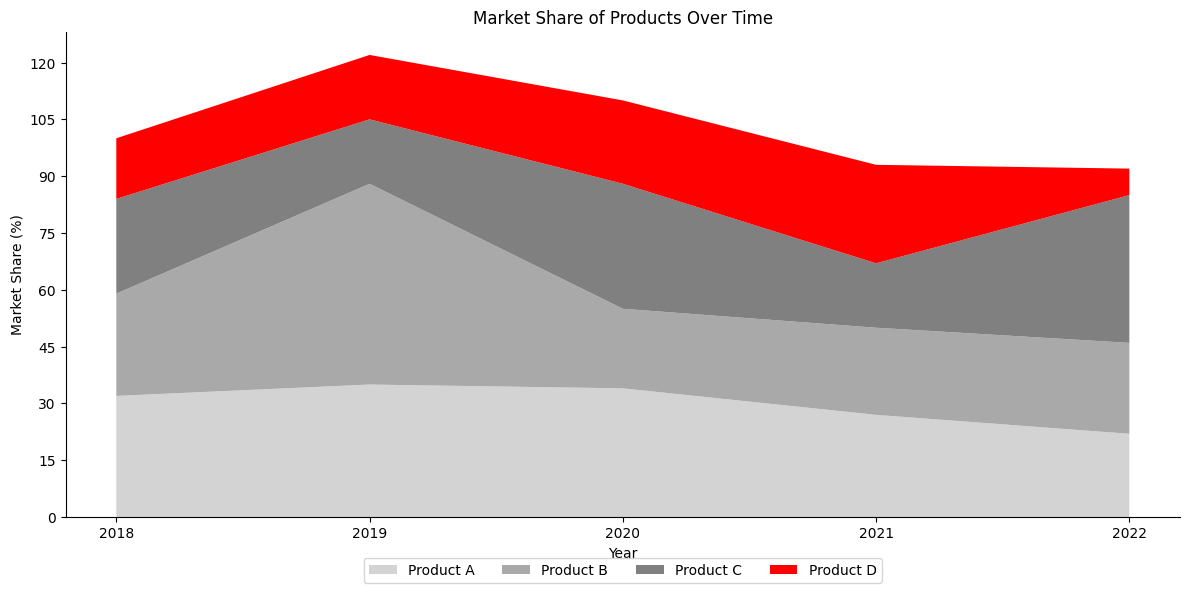

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator, FixedLocator

# Générer des données variées
np.random.seed(0)  # Pour la reproductibilité
years = [2018, 2019, 2020, 2021, 2022]
num_years = len(years)
num_products = 4

# Générer des données avec du bruit
data = {
    'Year': years,
    'Product A': np.random.randint(20, 50, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product B': np.random.randint(15, 45, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product C': np.random.randint(10, 40, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product D': np.random.randint(5, 30, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int)
}

# Assurer que les valeurs sont positives
for key in data:
    if key != 'Year':
        data[key] = np.maximum(data[key], 0)

df = pd.DataFrame(data)
df = df.set_index('Year')

# Trier les colonnes par valeur décroissante pour chaque année
for year in df.index:
    df.loc[year] = df.loc[year].sort_values(ascending=False)

# Définir la palette de couleurs
colors = {
    'Product A': '#D3D3D3',  # Light Gray
    'Product B': '#A9A9A9',  # Darker Gray
    'Product C': '#808080',  # Even Darker Gray
    'Product D': '#FF0000'   # Red
}

# Créer le graphique à rubans
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(df.index, df.T.values, labels=df.columns, colors=[colors[col] for col in df.columns])

# Mise en forme du graphique
plt.title('Market Share of Products Over Time')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')

# Configuration de l'axe des x pour afficher uniquement les années entières
ax.xaxis.set_major_locator(FixedLocator(df.index))  # Fixer les positions des ticks sur les années entières
ax.set_xticks(df.index)  # Définir les positions des ticks
ax.set_xticklabels(df.index)  # Définir les labels des ticks

# Configuration de l'axe des ordonnées pour afficher uniquement des entiers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Déspiner les axes supérieurs et droits
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Déplacer la légende en bas
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.tight_layout()
fig.savefig("./images/ch07_33.png")
plt.show()
